In [64]:
import seaborn as sns
import pandas as pd

In [65]:
# Read the JSONL file and load the data into a DataFrame using pandas
name = 'cp_shardq2'
df = pd.read_json(f'{name}.jsonl', lines=True)
df['qo_factor'] = (df['kv_len'] / 1024).astype(int)

In [66]:
# Group the DataFrame by the specified columns and calculate the mean and standard deviation of 'median_compute_time'
aggregated_df = df.groupby(['batch_size', 'qo_factor', 'num_qo_heads', 'num_kv_heads', 'head_dim', 'cp_degree']).agg(
    avg_median_compute_time=('median_compute_time', 'mean'),
    std_median_compute_time=('median_compute_time', 'std'),
    # max_median_compute_time=('median_compute_time', 'max'),
    # min_median_compute_time=('median_compute_time', 'min')
).reset_index()

aggregated_df["value_str"] = aggregated_df.apply(
    lambda row: f"{row['avg_median_compute_time']:.2f} ± {row['std_median_compute_time']:.2f}",
    axis=1
)

# Display the aggregated DataFrame
aggregated_df


,batch_size,qo_factor,num_qo_heads,num_kv_heads,head_dim,cp_degree,avg_median_compute_time,std_median_compute_time,value_str
0,1,8,32,8,128,1,3.631872,NaN,3.63 ± nan
1,1,8,32,8,128,4,1.375392,0.000940,1.38 ± 0.00
2,1,16,32,8,128,1,15.032832,NaN,15.03 ± nan
3,1,16,32,8,128,4,4.196008,0.001595,4.20 ± 0.00
4,1,32,32,8,128,1,56.718273,NaN,56.72 ± nan
5,1,32,32,8,128,4,15.817384,0.001842,15.82 ± 0.00
6,1,64,32,8,128,1,214.198830,NaN,214.20 ± nan
7,1,64,32,8,128,4,56.492609,1.411741,56.49 ± 1.41
8,1,128,32,8,128,1,854.217041,NaN,854.22 ± nan
9,1,128,32,8,128,4,214.804428,0.010970,214.80 ± 0.01


# Tweak the `cp_degree` here and generate the heatmaps

In [67]:
# filter aggregate_df to only include rows where cp_degree is 8
cp_degree = 2
aggregated_df_filtered_cp = aggregated_df[aggregated_df['cp_degree'] == cp_degree]

In [68]:
import matplotlib.pyplot as plt

# Create a heatmap with seaborn
heatmap_data = aggregated_df_filtered_cp.pivot(
    index="qo_factor", 
    columns="batch_size", 
    values="avg_median_compute_time"
)
num_qo_heads = aggregated_df_filtered_cp["num_qo_heads"].unique()[0]
num_kv_heads = aggregated_df_filtered_cp["num_kv_heads"].unique()[0]
cp_degree = aggregated_df_filtered_cp["cp_degree"].unique()[0]
title = (
    f'''
    Avg Median Compute Time (ms) of CP-ShardQ with
    CP_degree = {cp_degree}, QO Heads = {num_qo_heads}, KV Heads = {num_kv_heads} , 
    '''
)

IndexError: index 0 is out of bounds for axis 0 with size 0

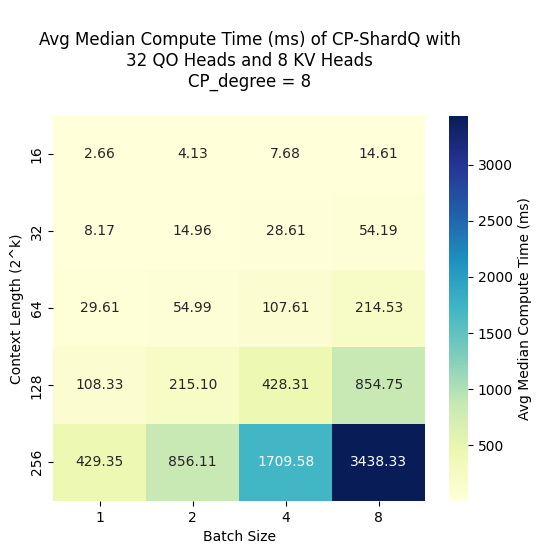

In [ ]:
plt.figure(figsize=(6, 5))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Avg Median Compute Time (ms)'})
plt.title(
    f'''
    Avg Median Compute Time (ms) of CP-ShardQ with
    {num_qo_heads} QO Heads and {num_kv_heads} KV Heads
    CP_degree = {cp_degree}
    ''')
plt.xlabel('Batch Size')
plt.ylabel('Context Length (2^k)')
plt.show()


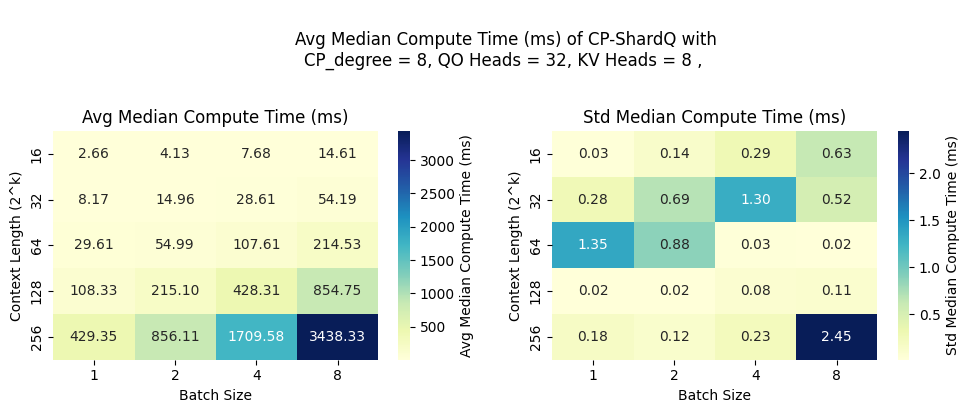

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two subplots side by side
fig, axes = plt.subplots(ncols=2, figsize=(10, 6))

# Heatmap for avg_median_compute_time
heatmap_data_avg = aggregated_df_filtered_cp.pivot(
    index="qo_factor", 
    columns="batch_size", 
    values="avg_median_compute_time"
)
sns.heatmap(heatmap_data_avg, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Avg Median Compute Time (ms)'}, ax=axes[0])
axes[0].set_title('Avg Median Compute Time (ms)')
axes[0].set_xlabel('Batch Size')
axes[0].set_ylabel('Context Length (2^k)')

# Heatmap for std_median_compute_time
heatmap_data_std = aggregated_df_filtered_cp.pivot(
    index="qo_factor", 
    columns="batch_size", 
    values="std_median_compute_time"
)
sns.heatmap(heatmap_data_std, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Std Median Compute Time (ms)'}, ax=axes[1])
axes[1].set_title('Std Median Compute Time (ms)')
axes[1].set_xlabel('Batch Size')
axes[1].set_ylabel('Context Length (2^k)')

# Set the main title for the figure
num_qo_heads = aggregated_df_filtered_cp["num_qo_heads"].unique()[0]
num_kv_heads = aggregated_df_filtered_cp["num_kv_heads"].unique()[0]
cp_degree = aggregated_df_filtered_cp["cp_degree"].unique()[0]


fig.suptitle(title, fontsize=12,)

# plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.tight_layout(rect=[0, 0.30, 1, 1])
fig.savefig(f'{name}_heatmap.cp={cp_degree}.png')
plt.show()


In [58]:

aggregated_df_filtered_cp.pivot(
    index="qo_factor", 
    columns="batch_size", 
    values="value_str"
)

batch_size,1,2,4,8
qo_factor,,,,
16,2.66 ± 0.03,4.13 ± 0.14,7.68 ± 0.29,14.61 ± 0.63
32,8.17 ± 0.28,14.96 ± 0.69,28.61 ± 1.30,54.19 ± 0.52
64,29.61 ± 1.35,54.99 ± 0.88,107.61 ± 0.03,214.53 ± 0.02
128,108.33 ± 0.02,215.10 ± 0.02,428.31 ± 0.08,854.75 ± 0.11
256,429.35 ± 0.18,856.11 ± 0.12,1709.58 ± 0.23,3438.33 ± 2.45
